## Gradiente


Dada un campo escalar $f(x, y, z)$ vamos a llamar gradiente al vector $\vec{\nabla}f$ que tiene por componentes las derivadas parciales de $f$ con respecto de $x$, $y$, y $z$.

$$\vec{\nabla}f
=
\begin{bmatrix}
\frac{\partial f}{\partial x}\\
\frac{\partial f}{\partial y}\\
\frac{\partial f}{\partial z}\\
\end{bmatrix}
$$

Por convención lo denotaremos como un vector columna. Si evaluamos $\vec{\nabla}f$ en cualquier punto de $f$ obtendremos un vector que apunta en la dirección de mayor cambio de $f$ y cuya magnitud nos indica la tasa de cambio en esa dirección.


Tomemos como ejemplo la función $f(x, y) = -\frac{4x}{x^2 + y^2 + 1}$

### Ejercicio


- Hacer una función que calcule el gradiente de una función.

In [45]:
def f(x, y):
    return -(4*x)/(x**2 + y**2 + 1)

Ejercicio del PROF

In [1]:
from sympy import symbols, Matrix, diff
def f(x, y):
    return -(4 * x) / (x**2 + y**2 + 1)
def calcular_gradiente():
    # Definir los símbolos
    x, y = symbols('x y')
    # Definir la función
    funcion = f(x, y)
    # Calcular las derivadas parciales con respecto a x y y
    df_dx = diff(funcion, x)
    df_dy = diff(funcion, y)
    # Crear el vector gradiente
    gradiente = Matrix([df_dx, df_dy])
    return gradiente
# Obtener el gradiente
gradiente_resultado = calcular_gradiente()
# Imprimir el resultado
print("Gradiente:", gradiente_resultado)

Gradiente: Matrix([[8*x**2/(x**2 + y**2 + 1)**2 - 4/(x**2 + y**2 + 1)], [8*x*y/(x**2 + y**2 + 1)**2]])


In [2]:
gradiente_resultado

Matrix([
[8*x**2/(x**2 + y**2 + 1)**2 - 4/(x**2 + y**2 + 1)],
[                       8*x*y/(x**2 + y**2 + 1)**2]])

## Matriz Jacobiana


La matriz jacobiana es una matriz formada por las derivadas parciales de primer orden de una función. En este sentido, el jacobiano representa la derivada de una función multivariable. La matriz jacobiana extiende la definición del gradiente a [campos vectoriales](#Glosario), para entenderlo veamos el caso más sencillo, el jacobiano de una función $f : \mathbb{R}^n \to \mathbb{R}$, en este caso particular $f$ es un [campo escalar](#Glosario) y el jacobiano tiene la siguiente forma:


$$\mathbf{J}_f(x_1, x_2, \cdots, x_n) 
=
\begin{bmatrix}
\frac{\partial f}{\partial x_1} & \frac{\partial f}{\partial x_2} & \cdots & \frac{\partial f}{\partial x_n}\\
\end{bmatrix}
$$


Podemos notar que en este caso la matriz jacobiana es un vector renglón que coincide con $\vec{\nabla}f$, cabe destacar que la matriz jacobiana es la transpuesta de $\vec{\nabla}f$ en esta notación.

Ahora extendamos el concepto a un [campo vectorial](#Glosario) $f : \mathbb{R}^n \to \mathbb{R}^m$. Esta función está determinada por m funciones escalares reales:

$$y_{i}=F_{i}(x_{1},\ldots ,x_{n})$$
$$\vec{y}=\vec {F}(\vec{x})=(F_{1}(\vec{x}),\dots ,F_{m}(\vec{x}))$$


En este caso la matriz jacobiana toma la siguiente forma:


$$\mathbf{J}_\vec{f(\vec{x})}
=
\begin{bmatrix}
\frac{\partial y_1}{\partial x_1} & \frac{\partial y_1}{\partial x_2} & \cdots & \frac{\partial y_1}{\partial x_n}\\
\frac{\partial y_2}{\partial x_1} & \frac{\partial y_2}{\partial x_2} & \cdots & \frac{\partial y_2}{\partial x_n}\\
\vdots & \vdots & \ddots & \vdots\\
\frac{\partial y_m}{\partial x_1} & \frac{\partial y_m}{\partial x_2} & \cdots & \frac{\partial y_m}{\partial x_n}\\
\end{bmatrix}
$$


Pongamos un ejemplo:

$$F(x_1, x_2, x_3) = (x_1x_2x_3, x_2 - x_3^3)$$

Esta es un [campo vectorial](#Glosario) $f : \mathbb{R}^3 \to \mathbb{R}^2$, noten que podemos simplificar la notación haciendo $\vec{x} \in  \mathbb{R}^3$ tal que $\vec{x} = (x_1, x_2, x_3)$, de esta forma:

$$\vec{F}(\vec{x}) = \vec{y}$$

Donde $\vec{y} = (y_1, y_2)$ y $y_1 =  x_1x_2x_3,$, $y_2 = x_2 - x_3^3$

Entonces la matriz jacobiana de F es:

$$\mathbf{J}_\vec{F(\vec{x})}
=
\begin{bmatrix}
\frac{\partial y_1}{\partial x_1} & \frac{\partial y_1}{\partial x_2} &  \frac{\partial y_1}{\partial x_3}\\
\frac{\partial y_2}{\partial x_1} & \frac{\partial y_2}{\partial x_2} &  \frac{\partial y_2}{\partial x_3}\\
\end{bmatrix}
$$

Ejercicio del PROF

In [28]:
import sympy as sp
x, y, z = sp.symbols('x y z')
def f1(x, y, z):
    return x * y * z
def f2(x, y, z):
    return y - z**3
f1_expr = f1(x, y, z)
f2_expr = f2(x, y, z)
jacobian_matrix = sp.Matrix([[sp.diff(f1_expr, x), sp.diff(f1_expr, y), sp.diff(f1_expr, z)],
                             [sp.diff(f2_expr, x), sp.diff(f2_expr, y), sp.diff(f2_expr, z)]])
print(jacobian_matrix)

Matrix([[y*z, x*z, x*y], [0, 1, -3*z**2]])


In [29]:
jacobian_matrix

Matrix([
[y*z, x*z,     x*y],
[  0,   1, -3*z**2]])

## Matriz Hessiana



Para hablar de la matriz Hessiana vamos a regresar a hablar de [campos escalares](#Glosario), la matriz hessiana de una función $f$ de $n$ variables tal que $f : \mathbb{R}^n \to \mathbb{R}$, es la matriz cuadrada de $n \times n$, de las segundas derivadas parciales.


$$\mathbf{H}_{f(\vec{x})}
=
\begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n}\\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n}\\
\vdots & \vdots & \ddots & \vdots\\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}\\
\end{bmatrix}
$$


Hay que notar que si las derivadas $\frac{\partial^2 f}{\partial x_i x_j}$ existen y son continuas, entonces $\frac{\partial^2 f}{\partial x_i x_j} = \frac{\partial^2 f}{\partial x_j x_i}$ y la matriz hessiana es simétrica.


Ejemplo: $-x^2 -y^2$

$$\frac{\partial^2 f}{\partial x^2} = \frac{\partial^2 f}{\partial x \partial x}$$

Ejercicio del PROF

In [46]:
import sympy as sp
x, y = sp.symbols('x y')
# Aqui se define la expresión
expr = -x**2 - y**2

# Calcula las derivadas parciales
d2f_dx2 = sp.diff(expr, x, 2)
d2f_dy2 = sp.diff(expr, y, 2)
d2f_dxdy = sp.diff(expr, x, y)
d2f_dydx = sp.diff(expr, y, x)

# Construcción de la matriz
hessiana_matrix = sp.Matrix([[d2f_dx2, d2f_dxdy],
                             [d2f_dydx, d2f_dy2]])
print("Matriz Hessiana para la función -x^2 - y^2:")
sp.pprint(hessiana_matrix, use_unicode=True)

# Calcula la determinante
determinante_hessiana = hessiana_matrix.det()
print("Determinante de la matriz Hessiana:")
sp.pprint(determinante_hessiana, use_unicode=True)

Matriz Hessiana para la función -x^2 - y^2:
⎡-2  0 ⎤
⎢      ⎥
⎣0   -2⎦
Determinante de la matriz Hessiana:
4


<hr>
<h2>Optimización</h2>
<h3>Descenso del gradiente</h3>

Vamos a hablar de optimización, que es la gran aplicación del cálculo en los temas que nos interesaran, el primer método que veremos es el descenso del gradiente. Si el gradiente señala la dirección de mayor crecimiento de la función $f$, es natural pensar que si lo _seguimos_ nos llevará al valor máximo de $f$, y si vamos en contra de él nos conducirá a un mínimo, si es que estos puntos existen. Esta idea es la que va detrás del método del _descenso del gradiente_ que nos permite optimizar funciones no restringidas.




In [2]:
def f(x, y):
    return 3*x**2 + 7*y**2

Ejercicio del PROF

Resultado optimizado para x: 4.102398514547257e-05
Resultado optimizado para y: 4.102398514547257e-05
Valor de la función en el mínimo: -3.3659347144319074e-09


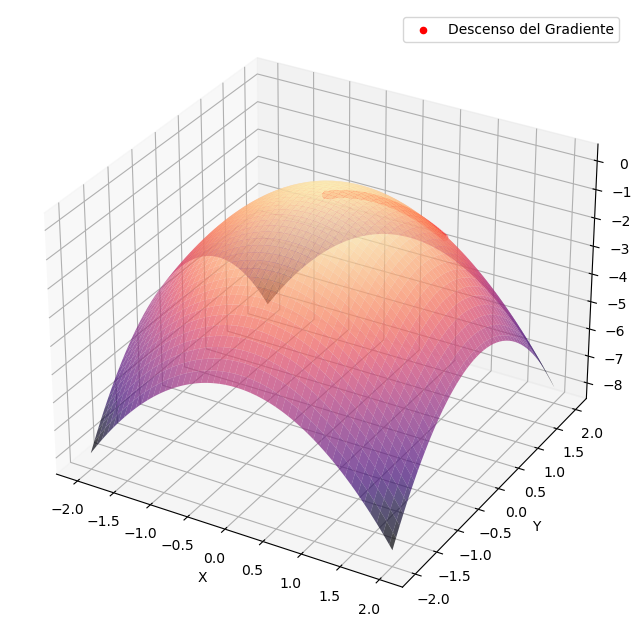

In [7]:
#Descargas las librerias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

#Declarar las funciones
def objective_function(x, y):
    return -x**2 - y**2
def gradient_descent(initial_x, initial_y, learning_rate, epochs):
    x_values = [initial_x]
    y_values = [initial_y]
    for _ in range(epochs):
        gradient_x = -2 * initial_x  # Derivada parcial con respecto a x
        gradient_y = -2 * initial_y  # Derivada parcial con respecto a y
        initial_x = initial_x + learning_rate * gradient_x
        initial_y = initial_y + learning_rate * gradient_y
        x_values.append(initial_x)
        y_values.append(initial_y)
    return x_values, y_values

# Parámetros iniciales
initial_x = 1.0
initial_y = 1.0
learning_rate = 0.01
epochs = 500

# Descenso del gradiente
x_values, y_values = gradient_descent(initial_x, initial_y, learning_rate, epochs)

# Resultado optimizado
final_x, final_y = x_values[-1], y_values[-1]
print("Resultado optimizado para x:", final_x)
print("Resultado optimizado para y:", final_y)
print("Valor de la función en el mínimo:", objective_function(final_x, final_y))

# Visualización del descenso del gradiente
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(13, 8))
X, Y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
Z = objective_function(X, Y)
ax.plot_surface(X, Y, Z, cmap=cm.magma, alpha=0.7)
ax.scatter(x_values, y_values, [objective_function(x, y) for x, y in zip(x_values, y_values)], color='red', label='Descenso del Gradiente')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

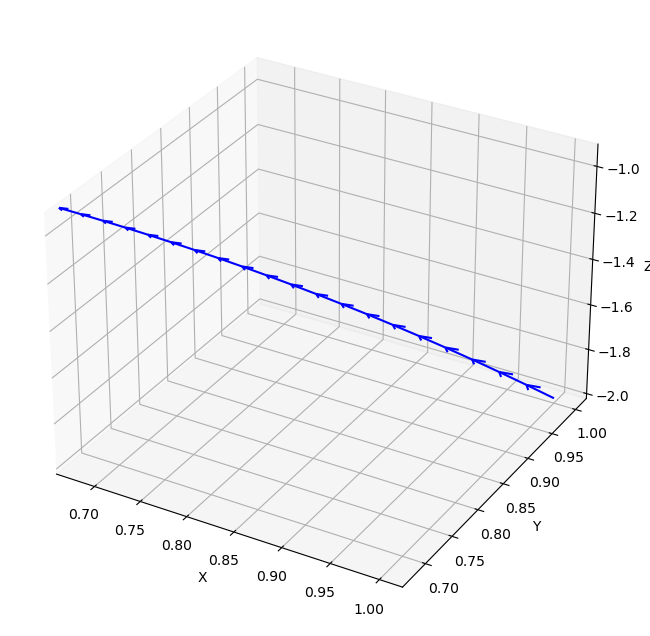

In [16]:
#Descargas las librerías
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

#Definir las funciones
def objective_function(x, y):
    return -x**2 - y**2
def gradient_descent(initial_x, initial_y, learning_rate, epochs):
    x_values = [initial_x]
    y_values = [initial_y]
    for _ in range(epochs):
        gradient_x = -2 * initial_x  # Derivada parcial con respecto a x
        gradient_y = -2 * initial_y  # Derivada parcial con respecto a y
        initial_x = initial_x + learning_rate * gradient_x
        initial_y = initial_y + learning_rate * gradient_y
        x_values.append(initial_x)
        y_values.append(initial_y)
    return x_values, y_values

# Parámetros iniciales
initial_x = 1.0
initial_y = 1.0
learning_rate = 0.01
epochs = 20  # Reducido para mejor visualización

# Descenso del gradiente
x_values, y_values = gradient_descent(initial_x, initial_y, learning_rate, epochs)

# Visualización de la dirección del gradiente
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(13, 8))

# Agregar flechas en la dirección del gradiente en cada paso
for i in range(1, len(x_values)):
    ax.quiver(x_values[i-1], y_values[i-1], objective_function(x_values[i-1], y_values[i-1]),
              x_values[i] - x_values[i-1], y_values[i] - y_values[i-1], objective_function(x_values[i], y_values[i]) - objective_function(x_values[i-1], y_values[i-1]),
              color='blue', label='Dirección del Gradiente' if i == 1 else '')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()